## **Housing Affordability**
### Why this metric?
We chose this metric to establish the difficulty of getting out of being homeless. Let's say you're homeless, wouldn't you much rather be in a neighborhood where you would have the highest chance of finding a place that you could afford for the lowest possible price rather than surrounded by million dollar houses which seem unreachable at your current state. We believe this metric is valueable in knowing which neighborhood would be the best for homeless people because it gives them the highest chance of getting themselves off of the streets due to the large amount of low cost housing.

In [2]:
import pandas as pd
import geopandas as geo
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
url = "https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/13982f58-e618-400c-8f69-6a32dbd7c68f/download/value.csv"
df = pd.read_csv(url)
df

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,"Estimate; Total: - Less than $10,000","Margin of Error; Total: - Less than $10,000","Estimate; Total: - $10,000 to $14,999","Margin of Error; Total: - $10,000 to $14,999","Estimate; Total: - $15,000 to $19,999","Margin of Error; Total: - $15,000 to $19,999",...,"Estimate; Total: - $500,000 to $749,999","Margin of Error; Total: - $500,000 to $749,999","Estimate; Total: - $750,000 to $999,999","Margin of Error; Total: - $750,000 to $999,999","Estimate; Total: - $1,000,000 to $1,499,999","Margin of Error; Total: - $1,000,000 to $1,499,999","Estimate; Total: - $1,500,000 to $1,999,999","Margin of Error; Total: - $1,500,000 to $1,999,999","Estimate; Total: - $2,000,000 or more","Margin of Error; Total: - $2,000,000 or more"
0,Allegheny Center,1,72.0,28.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000
1,Allegheny West,2,69.0,31.000000,4.0,7.000000,0.0,10.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,11.0,17.000000,0.0,10.000000,0.0,10.000000
2,Allentown,3,538.0,112.769677,45.0,33.734256,19.0,21.118712,22.0,26.153394,...,6.0,16.763055,0.0,17.320508,0.0,17.320508,0.0,17.320508,0.0,17.320508
3,Arlington,4,492.0,84.433406,12.0,16.186414,29.0,27.513633,5.0,16.248077,...,7.0,17.916473,0.0,17.320508,3.0,15.779734,0.0,17.320508,0.0,17.320508
4,Arlington Heights,5,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,Upper Lawrenceville,87,594.0,115.952577,0.0,17.320508,0.0,17.320508,17.0,27.856777,...,0.0,17.320508,0.0,17.320508,0.0,17.320508,0.0,17.320508,0.0,17.320508
87,West End,88,35.0,23.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000
88,West Oakland,89,204.0,51.855569,0.0,14.142136,0.0,14.142136,10.0,16.401219,...,0.0,14.142136,0.0,14.142136,0.0,14.142136,0.0,14.142136,0.0,14.142136
89,Westwood,90,973.0,102.552426,29.0,25.495098,0.0,14.142136,0.0,14.142136,...,0.0,14.142136,0.0,14.142136,0.0,14.142136,0.0,14.142136,0.0,14.142136


In [3]:
url = "https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/13982f58-e618-400c-8f69-6a32dbd7c68f/download/value.csv"
df = pd.read_csv(url)
newDf = df[df['Estimate; Total: - Less than $10,000'] > 0]
decendingDf = newDf.sort_values(by='Estimate; Total: - Less than $10,000', ascending=False)
decendingDf[['Neighborhood', 'Estimate; Total:', 'Estimate; Total: - Less than $10,000', 'Margin of Error; Total: - Less than $10,000']]

,Neighborhood,Estimate; Total:,"Estimate; Total: - Less than $10,000","Margin of Error; Total: - Less than $10,000"
34,Garfield,628.0,54.0,28.407745
13,Brookline,4245.0,47.0,50.259327
2,Allentown,538.0,45.0,33.734256
77,Squirrel Hill South,3152.0,36.0,47.791213
51,Morningside,954.0,34.0,30.692019
73,South Side Slopes,1053.0,31.0,33.896903
89,Westwood,973.0,29.0,25.495098
53,Mount Washington,1828.0,27.0,31.128765
41,Homewood South,396.0,27.0,26.776856
5,Banksville,985.0,26.0,35.510562


In [4]:
url = "https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/13982f58-e618-400c-8f69-6a32dbd7c68f/download/value.csv"
df = pd.read_csv(url)
newDf = df[df['Estimate; Total: - Less than $10,000'] > 0]
decendingDf = newDf.sort_values(by='Estimate; Total: - Less than $10,000', ascending=False).head(25)
decendingDf[['Neighborhood', 'Estimate; Total:', 'Estimate; Total: - Less than $10,000', 'Margin of Error; Total: - Less than $10,000']]

,Neighborhood,Estimate; Total:,"Estimate; Total: - Less than $10,000","Margin of Error; Total: - Less than $10,000"
34,Garfield,628.0,54.0,28.407745
13,Brookline,4245.0,47.0,50.259327
2,Allentown,538.0,45.0,33.734256
77,Squirrel Hill South,3152.0,36.0,47.791213
51,Morningside,954.0,34.0,30.692019
73,South Side Slopes,1053.0,31.0,33.896903
89,Westwood,973.0,29.0,25.495098
53,Mount Washington,1828.0,27.0,31.128765
41,Homewood South,396.0,27.0,26.776856
5,Banksville,985.0,26.0,35.510562


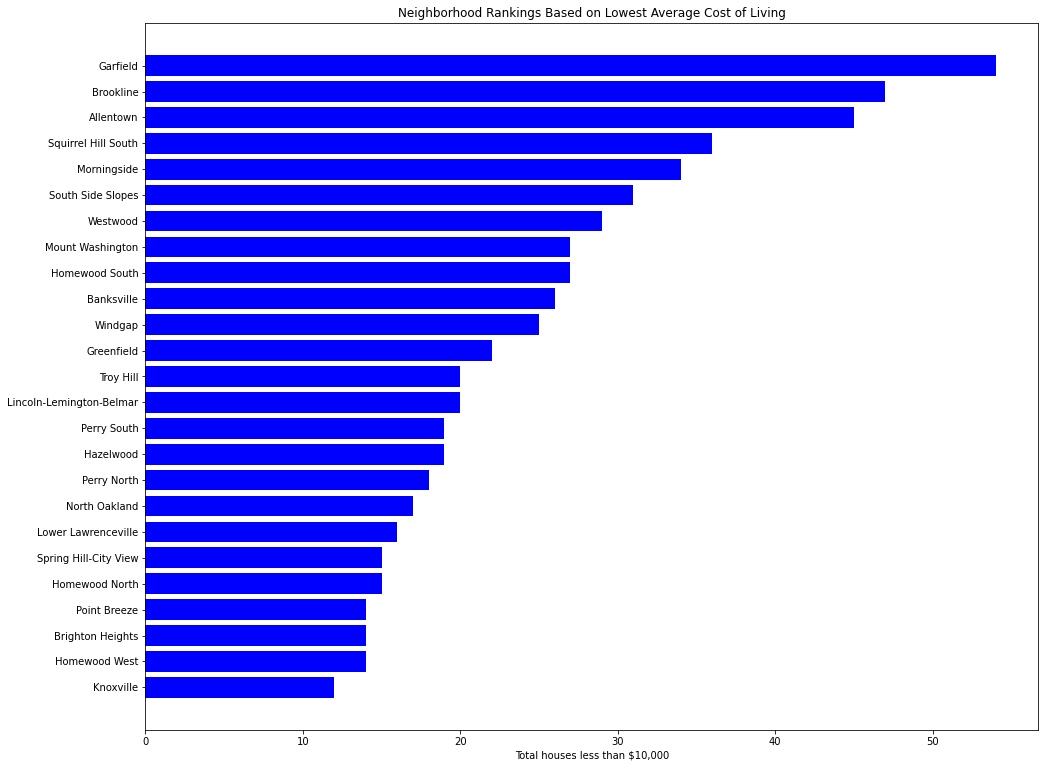

In [5]:
plt.figure(figsize=(16, 13))
plt.barh(decendingDf['Neighborhood'], decendingDf['Estimate; Total: - Less than $10,000'], color='blue')
plt.xlabel('Total houses less than $10,000')
plt.title('Neighborhood Rankings Based on Lowest Average Cost of Living')
plt.gca().invert_yaxis() 
plt.show()

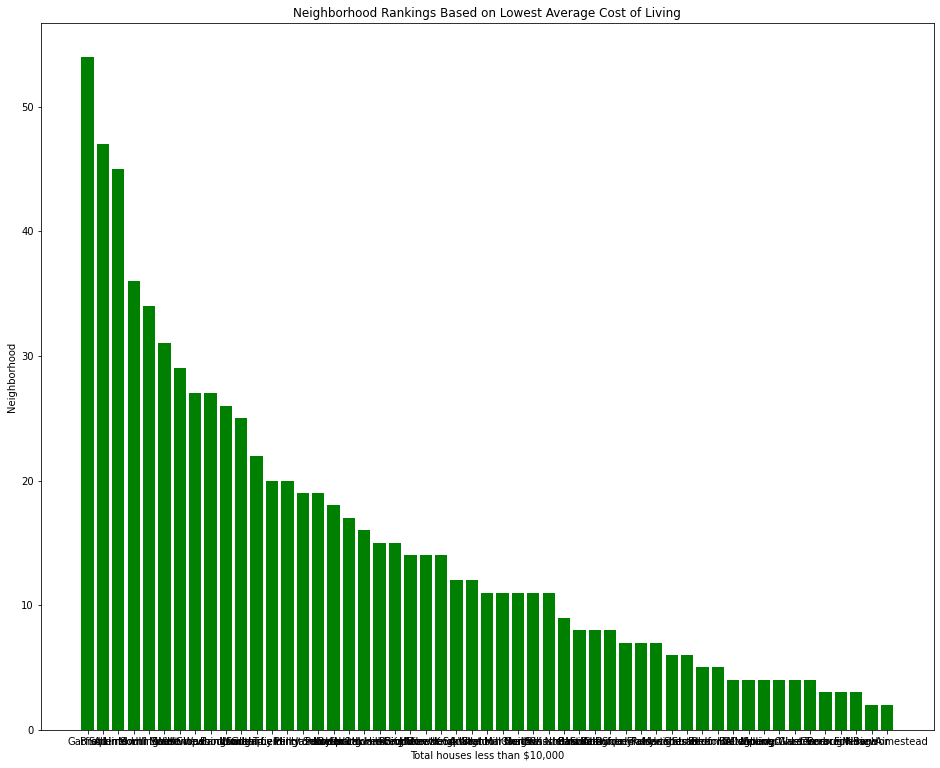

In [18]:
plt.figure(figsize=(16, 13))
plt.bar(decendingDf['Neighborhood'], decendingDf['Estimate; Total: - Less than $10,000'], color='green')
plt.xlabel('Total houses less than $10,000')
plt.title('Neighborhood Rankings Based on Lowest Average Cost of Living')
plt.ylabel('Neighborhood')
plt.show()

### Data interpertation:
**Organization:** I organized the data to only include the cheapest neighborhoods in the Pittsburgh area by looking at the neighborhoods with the lowest cost of living on average, and the number of houses between 0 and $10,000. Additionally, I decided to only include the first 25 of the data points because the other 74 data points are irrelevant because I am only interested in the lowest cost of living.

**What this mean:** Based on the data set that I found it is clear that the top three neighborhoods with the lowest cost of living are, Garfield, Brookline and Allentown. Although Garfield would be the best neighborhood, because it is the cheapest, this isn't the case for all of the other metrics.